In [62]:
import matplotlib.pyplot as plt
import os.path
import numpy as np
%matplotlib inline

In [63]:
import Scripts_SigNonSig
reload(Scripts_SigNonSig)
from Scripts_SigNonSig import * 

In [64]:
out = get_data_for_sig_nonsig_analyses()
df_50_coutance = get_data_coutanche()
df_50 = out['df_50']

In [65]:
df_50_coutance['PID']=df_50_coutance['PID']+df_50_sig['PID'].max() # change pid's


# Load Bootstrap Data 

In [66]:
boot_results_vc = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_visual_cortex.npz')
boot_results_vt = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_ventral_temporal.npz')
boot_results_both = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_both_visual.npz')
boot_results_frontal_all = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_full.npz')
boot_results_frontal_sig = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_sig.npz')
boot_results_frontal_non = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_nonsig.npz')
boot_results_frontal_rule = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_rule.npz')

In [67]:
x = np.linspace(0,1,100) # what range for cdf # 
epcdf_store_vt = boot_results_vt['epcdf_store']
eppdf_store_vt = boot_results_vt['eppdf_store']
meann_vt = boot_results_vt['meann']
mediann_vt = boot_results_vt['mediann']
meann_study_vt=boot_results_vt['meann_study']
perc25_vt = boot_results_vt['perc25']
perc75_vt = boot_results_vt['perc75']

epcdf_store_vc = boot_results_vc['epcdf_store']
eppdf_store_vc = boot_results_vc['eppdf_store']
meann_vc = boot_results_vc['meann']
mediann_vc = boot_results_vc['mediann']
meann_study_vc=boot_results_vc['meann_study']
perc25_vc = boot_results_vc['perc25']
perc75_vc = boot_results_vc['perc75']

epcdf_store_both = boot_results_both['epcdf_store']
eppdf_store_both = boot_results_both['eppdf_store']
meann_both = boot_results_both['meann']
mediann_both = boot_results_both['mediann']
meann_study_both=boot_results_both['meann_study']
perc25_both = boot_results_both['perc25']
perc75_both = boot_results_both['perc75']

epcdf_store_frontal_all = boot_results_frontal_all['epcdf_store']
eppdf_store_frontal_all = boot_results_frontal_all['eppdf_store']
meann_frontal_all = boot_results_frontal_all['meann']
mediann_frontal_all = boot_results_frontal_all['mediann']
meann_study_frontal_all=boot_results_frontal_all['meann_study']
perc25_frontal_all = boot_results_frontal_all['perc25']
perc75_frontal_all = boot_results_frontal_all['perc75']

epcdf_store_frontal_sig = boot_results_frontal_sig['epcdf_store']
eppdf_store_frontal_sig = boot_results_frontal_sig['eppdf_store']
meann_frontal_sig = boot_results_frontal_sig['meann']
mediann_frontal_sig = boot_results_frontal_sig['mediann']
meann_study_frontal_sig=boot_results_frontal_sig['meann_study']
perc25_frontal_sig = boot_results_frontal_sig['perc25']
perc75_frontal_sig = boot_results_frontal_sig['perc75']

epcdf_store_frontal_non = boot_results_frontal_non['epcdf_store']
eppdf_store_frontal_non = boot_results_frontal_non['eppdf_store']
meann_frontal_non = boot_results_frontal_non['meann']
mediann_frontal_non = boot_results_frontal_non['mediann']
meann_study_frontal_non=boot_results_frontal_non['meann_study']
perc25_frontal_non = boot_results_frontal_non['perc25']
perc75_frontal_non = boot_results_frontal_non['perc75']

epcdf_store_frontal_rule = boot_results_frontal_rule['epcdf_store']
eppdf_store_frontal_rule = boot_results_frontal_rule['eppdf_store']
meann_frontal_rule = boot_results_frontal_rule['meann']
mediann_frontal_rule = boot_results_frontal_rule['mediann']


# Plot - 


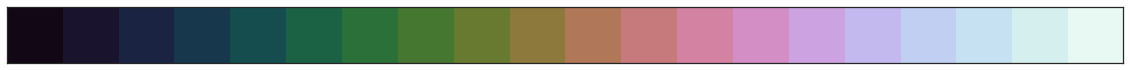

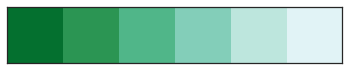

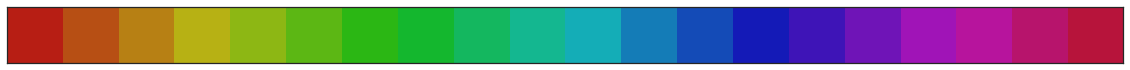

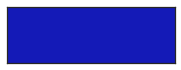

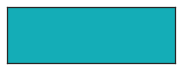

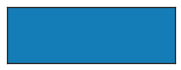

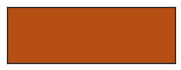

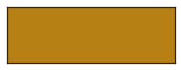

In [68]:
import seaborn as sns


pcube = sns.color_palette("cubehelix",20)
sns.palplot(pcube)

pbg = sns.color_palette("BuGn_r")
sns.palplot(pbg)

phusl = sns.hls_palette(20,l=.4,s=.8)
sns.palplot(phusl)

frontalb = phusl[13]
frontalrule = phusl[11]
frontalnotrule = phusl[10]
#visualb = phusl[]
visualc = phusl[1]
visualt = phusl[2]

sns.palplot(frontalb)
sns.palplot(frontalnotrule)
sns.palplot(frontalrule)
sns.palplot(visualc)
sns.palplot(visualt)


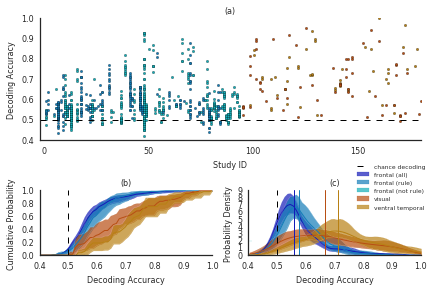

In [69]:
import matplotlib.gridspec as gridspec
fig = plt.figure()

sns.set_style('white')
params = {
   'axes.labelsize': 8,
   'axes.titlesize': 8,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 6,
   'legend.fontsize': 6,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [6, 4],
    'font.family':'cambria'
}
plt.rcParams.update(params)

alphadots=1.0
sizedots=6
mainlinewidth = 1
whiteoutline = 0.1
median_line_widths=1
chanceline = 1
alphaa =0.7


gs = gridspec.GridSpec(10, 8)
ax1 = plt.subplot(gs[0:6,:])
ax2 = plt.subplot(gs[6:10,0:4])
ax3 = plt.subplot(gs[6:10,4:8])


###### SCATTER ##### 

# all 
y= df_50.loc[df_50['Info.type']!='Rule','Accuracy.50'].as_matrix()
x= df_50.loc[df_50['Info.type']!='Rule','PID'].as_matrix()
ax1.scatter(y=y,x=x,s=sizedots,c=frontalnotrule,alpha=alphadots)

# rule
y= df_50.loc[df_50['Info.type']=='Rule','Accuracy.50'].as_matrix()
x= df_50.loc[df_50['Info.type']=='Rule','PID'].as_matrix()
ax1.scatter(y=y,x=x,s=sizedots,c=frontalrule,alpha=alphadots)

# ventral tempora. 
y= df_50_coutance.loc[df_50_coutance['Visual_Region']=='Ventral Temporal Regions','Accuracy.50'].as_matrix()
x= df_50_coutance.loc[df_50_coutance['Visual_Region']=='Ventral Temporal Regions','PID'].as_matrix()
ax1.scatter(y=y,x=x+.2,s=sizedots,c=visualt,alpha=alphadots)

# visual cortex 
y= df_50_coutance.loc[df_50_coutance['Visual_Region']=='Visual Cortex','Accuracy.50'].as_matrix()
x= df_50_coutance.loc[df_50_coutance['Visual_Region']=='Visual Cortex','PID'].as_matrix()
ax1.scatter(y=y,x=x+.2,s=sizedots,c=visualc,alpha=alphadots)

x = np.linspace(0,1,100) # what range for cdf # 

#### CDF 


# frontal all 
upci = np.percentile(epcdf_store_frontal_all[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_frontal_all[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(epcdf_store_frontal_all,axis=0)[40:100],linewidth=mainlinewidth,color=frontalb)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalb,alpha=alphaa)
ax2.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax2.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)

# frontal rule 
upci = np.percentile(epcdf_store_frontal_rule[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_frontal_rule[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(epcdf_store_frontal_rule,axis=0)[40:100],linewidth=mainlinewidth,color=frontalrule)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=frontalrule,alpha=alphaa)
ax2.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax2.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)


# visual cortex 
upci = np.percentile(epcdf_store_vc[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_vc[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(epcdf_store_vc,axis=0)[40:100],linewidth=mainlinewidth,color=visualc)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=visualc,alpha=alphaa)
ax2.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax2.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)

#  ventral temporal 
upci = np.percentile(epcdf_store_vt[40:100],97.5,axis=0)
loci = np.percentile(epcdf_store_vt[40:100],2.5,axis=0)
ax2.plot(x[40:100],np.mean(epcdf_store_vt,axis=0)[40:100],linewidth=mainlinewidth,color=visualt)
ax2.fill_between(x[40:100],upci[40:100],loci[40:100],color=visualt,alpha=alphaa)
ax2.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax2.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)

############
##### PDF 

upci = np.percentile(eppdf_store_frontal_all[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_frontal_all[40:100],2.5,axis=0)
ax3.plot(x[40:100],np.mean(eppdf_store_frontal_all,axis=0)[40:100],linewidth=mainlinewidth,color=frontalb)
ax3.fill_between(x[40:100],upci[40:100],loci[40:100],label='frontal (all)',color=frontalb,alpha=alphaa)
ax3.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax3.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)


upci = np.percentile(eppdf_store_frontal_rule[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_frontal_rule[40:100],2.5,axis=0)
ax3.plot(x[40:100],np.mean(eppdf_store_frontal_rule,axis=0)[40:100],linewidth=mainlinewidth,color=frontalrule)
ax3.fill_between(x[40:100],upci[40:100],loci[40:100],label='frontal (rule)',color=frontalrule,alpha=alphaa)
ax3.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax3.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)

# not rule for legend
ax3.fill_between(x[40:42],[2,2],[2.01,2.01],color=frontalnotrule,
                 alpha=alphaa,label='frontal (not rule)')
#ax3.scatter(x[40],[2],color=frontalnotrule,
#                 alpha=alphaa,label='frontal (not rule)')

upci = np.percentile(eppdf_store_vc[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_vc[40:100],2.5,axis=0)
ax3.plot(x[40:100],np.mean(eppdf_store_vc,axis=0)[40:100],linewidth=mainlinewidth,color=visualc)
ax3.fill_between(x[40:100],upci[40:100],loci[40:100],label='visual',color=visualc,alpha=alphaa)
ax3.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax3.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)

upci = np.percentile(eppdf_store_vt[40:100],97.5,axis=0)
loci = np.percentile(eppdf_store_vt[40:100],2.5,axis=0)
ax3.plot(x[40:100],np.mean(eppdf_store_vt,axis=0)[40:100],linewidth=mainlinewidth,color=visualt)
ax3.fill_between(x[40:100],upci[40:100],loci[40:100],label='ventral temporal',color=visualt,alpha=alphaa)
ax3.plot(x[40:100],upci[40:100],color='white',linewidth=whiteoutline)
ax3.plot(x[40:100],loci[40:100],color='white',linewidth=whiteoutline)


ax1.set_ylim(0.4,1.0)
ax1.set_xlim(-2,180)
ax1.yaxis.grid(False)

ax1.axhline(y=0.5,color='k',linestyle='--',linewidth=chanceline)
ax2.axvline(x=0.5,color='k',linestyle='--',linewidth=chanceline)
ax3.axvline(x=0.5,color='k',linestyle='--',label='chance decoding',linewidth=chanceline)

ax3.axvline(x=mediann_vt.mean(),color=visualt,linewidth=median_line_widths)
ax3.axvline(x=mediann_frontal_rule.mean(),color=frontalrule,linewidth=median_line_widths)
ax3.axvline(x=mediann_vc.mean(),color=visualc,linewidth=median_line_widths)
ax3.axvline(x=mediann_frontal_all.mean(),color=frontalb,linewidth=median_line_widths)


plt.legend(bbox_to_anchor=(.6, 1.5), loc=2)

axis_font = {'fontname':'Arial', 'size':'16'}
ax1.set_xlabel('Study ID')
ax1.set_ylabel('Decoding Accuracy')
ax2.set_xlabel('Decoding Accuracy')
ax2.set_ylabel('Cumulative Probability')
ax3.set_xlabel('Decoding Accuracy')
ax3.set_ylabel('Probability Density')
ax1.set_title('(a)')
ax2.set_title('(b)')
ax3.set_title('(c)')

for ax in [ax1,ax2,ax3]:
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    #for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #    label.set_fontname('Arial')
    #    label.set_fontsize(16)
    ax.set_axis_bgcolor('white')


plt.tight_layout(h_pad=2.0,w_pad=1.0)
plt.savefig('../Figures/Main/Figure1.png',dpi=300)
plt.show()